# Demo: LLM Agent with Tavily & LangGraph

This notebook demonstrates the usage of your LangGraph pipeline that integrates:
- ✅ Query parsing (subquery generation)
- ✅ Tavily search via Async API
- ✅ Cohere LLM with streaming response
- ✅ Pretty CLI output

In [2]:
%reload_ext autoreload
%autoreload 2

import nest_asyncio
from agent.langraph_pipeline import TavilyRAGPipeline


## ⚙️ Setup

Make sure the following environment variables are set:

```bash
export COHERE_API_KEY=your_cohere_key
export TAVILY_API_KEY=your_tavily_key
```
and install the required packages:
```bash
pip install -r requirements.txt
```

In [3]:
from dotenv import load_dotenv
load_dotenv()
nest_asyncio.apply()

LangGraph Structure:


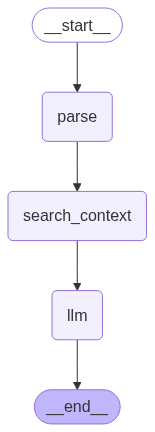

In [4]:
pipeline = TavilyRAGPipeline(show_subqueries=True)
pipeline.visualize()

In [5]:
async def run(queries, debug=False):
    config={"thread_id": 1}
    # To change the memory scope to be per query, uncomment the first line in the loop below.
    for q in queries:
        # rconfig={"thread_id": f"run-{hash(q)}"}
        await pipeline.get_graph().ainvoke({"query": q}, config=config, debug=debug)

In [21]:
# Define categorized test queries
test_cases = {
    "Simple Queries": [
        "What is LangGraph?",
    ],
    "Queries for Subquerying": [
        "What is the capital of France?",
        "What are the features of LangGraph and who uses it?",
        "Why do we drink milk, coffee, and tea?",
    ],
    "Queries for Checkpointing": [
        "Where is France located?",
        "Where is Germany located?",
        "Where is France located?",
    ],
    "Stress Testing Queries": [
        "Tell me about LangGraph's benefits, use cases, integration with LLMs, industry adoption, competitors, and deployment options."
    ],
    "Robustness Queries": [
        "Blargle wib wib ahsheli LangGraph elephant?"
    ],
    "Short Keyword Queries": [
        "LangGraph"
    ]
}

In [22]:
for label, queries in test_cases.items():
    print(f"\n=== Running: {label} ===")
    if label == "Queries for Subquerying":
        debug = True
    else:
        debug = False
    await run(queries, debug=debug)


=== Running: Simple Queries ===
================================= Human Query ==================================

What is LangGraph?

================================= AI Response ==================================
LangGraph is an AI agent framework developed by LangChain. It provides a
comprehensive framework for developers to design, deploy and manage intricate
AI agent workflows. Essentially, it simplifies the development of complex
applications by offering a structured platform that manages the intricate
connections between different components. 

LangGraph utilises a graph-based
architecture, visualising and managing the steps in an AI workflow process. It
helps in coordinating the data flow and sequence of operations, thus enabling
developers to focus on the higher-level logic and functionality of the
application. 

It is designed to be an easy-to-use module, especially for
creating conversational state machines, and can be integrated with other
LangChain products to create robu

Exception: [Error calling Cohere: status_code: 429, body: {'id': '12048eca-c952-4b24-ac5d-f994489bf60c', 'message': "You are using a Trial key, which is limited to 10 API calls / minute. You can continue to use the Trial key for free or upgrade to a Production key with higher rate limits at 'https://dashboard.cohere.com/api-keys'. Contact us on 'https://discord.gg/XW44jPfYJu' or email us at support@cohere.com with any questions"}]